<img src="images/pepito_topdown.jpg">

In [1]:
from astropy import units as u

In [2]:
import numpy as np

# Pepito Characterization Exercise & Lab

The fiber output from Pepito has 7 spots that each have diameter 100$\mu$m.  They are separated by less than that, maybe $\sim10\mu$m.

The expected input is from an f/10 beam, so the first lens is an f/10 collimator.

Parallel rays come and hit the diffraction grating, which has 830 lines/mm.  It is about 2cm long.

The diffracted light is then focused onto the CCD with an f/10 camera.

Assume the camera has focal length 10cm.  (These numbers are largely guesswork!)

The SBIG has 9 micron pixels.

# Fill in the blanks.

Questions are asked using

## bigger
### fonts

The angle of the bend in Pepito is _approximately_ 20 degrees.

## Using a protractor or other device, what angle do you measure for the whole system?

In [3]:
angle = 21

The angle of the grating is _supposedly_ 0 degrees with respect to the collimated beam - we'll assume that at the start of this exercise.   But, now's a good time to measure it.

## Using the same tool, what is the angle of the grating with respect to the incoming light?

(you won't use this until the [redesign](#Redesign-questions) section below

In [4]:
grating_angle = 0

The information above comes from lab notes and Amanda Townsend's thesis.  We will aim to verify these measurements.

In [5]:
grooves_per_mm = 830*u.mm**-1
pixel_size = 10*u.um
f_cam = 10*u.cm

### At what angle is the first order for $\lambda=4000,5000,6000 \dot{A}$?

Recall the grating equation:

$$ n \lambda = D \sin \theta $$

where

 * $n$ is the order number and must be an integer
 * $\lambda$ is the wavelength
 * $D$ is the distance between holes (gaps) in the grating
 * $\theta$ is the angle defined such that $\theta=0$ is perpendicular to the grating (or parallel to the direction of the light) 
 

In [6]:
order_number = 1
wavelength = [4000,5000,6000]*u.AA
# 1 Angstrom = 0.1 nanometers
wavelength = [400,500,600]
print(wavelength)

[400, 500, 600]


In [7]:
theta = []
D = 830
for n in wavelength:
    theta_angle = np.arcsin(n/D)
    theta.append(theta_angle)
theta = theta*u.rad
theta.to(u.deg)

<Quantity [28.81137971, 37.04267093, 46.29373244] deg>

### What wavelength is centered assuming the angle is 20 deg?

In [8]:
degrees = 20*u.deg
radians = degrees.to(u.rad)
wavelength = D*np.sin(radians)
wavelength = wavelength*u.nm
wavelength = wavelength.to(u.AA)
wavelength

<Quantity 2838.7671896 Angstrom>

### What is the diffraction limited resolution from the grating?

Recall $$ \Delta \lambda = \frac{\lambda}{N n}$$

Assuming our slit has 1cm of illuminated area, what is the resolution in terms of both wavelength and $R$?

Assume 5000 Angstroms as our central wavelength

In [9]:
illumination_size_on_grating = 1*u.cm

In [10]:
dlambda_diffraction = (5000*u.AA/illumination_size_on_grating.to(u.AA))
dlambda_diffraction

<Quantity 5.e-05>

If this is smaller than our pixel size, we under-sample the diffraction limit.

In that case, the pixel size sets our resolution limit, not the grating diffraction limit.

In [11]:
# What is the resolution or resolving power "R" at 5000 angstroms?
R = (np.arcsin(dlambda_diffraction)).decompose()
R

<Quantity 5.e-05 rad>

### What is the wavelength difference per pixel?

Recall that the spatial separation per unit wavelength is:
$$ \frac{dx}{d\lambda} = \frac{\Delta x}{\Delta \lambda} =  \frac{ f_{cam} n }{D \cos \theta}$$
where $n$ is the order number, $D$ is the distance between gaps in the grating, $dx\sim\Delta x$ is the pixel spacing, and $d\lambda\sim\Delta\lambda$ is the wavelength spacing.

In [12]:
d_groove = grooves_per_mm**-1
dispersion = d_groove*np.cos(degrees)
dispersion = dispersion.to(u.um)/f_cam
dispersion = dispersion.decompose()

In [13]:
dlambda_per_pix = (dispersion * pixel_size).to(u.nm)
dlambda_per_pix

<Quantity 0.11321598 nm>

### What is the resolution limit from our slit?

Recall, to be diffraction-limited, the spectrograph must have
$$ \sin \theta_{slit} < \frac{n \Delta \lambda}{D}$$

In [14]:
arcsind = (dlambda_per_pix/d_groove).decompose()
slit_resolution_limit = np.arcsin(arcsind).to(u.arcsec)
slit_resolution_limit

<Quantity 19.38255166 arcsec>

### What is the effect if our slit is bigger than this?

If the slit is bigger than this our resolution limit will decrease.

Assume that the size of the fiber pinholes is 100 $\mu$m.

Our telescope is a 14" f/10.

### Is the fiber slit limiting our resolution?

In [15]:
new_d_groove = 100*u.um
arcsind2 = (dlambda_per_pix/new_d_groove).decompose()
angsize_of_slit = np.arcsin(arcsind2).to(u.arcsec)
angsize_of_slit

<Quantity 0.23352472 arcsec>

### What is the expected resolution of Pepito at 5000 Angstroms??

In [16]:
theta = 24.519*u.deg
radians = theta.to(u.rad)
wavelength = (1/grooves_per_mm)*np.sin(radians)
wavelength = wavelength.to(u.AA)

dispersion = (1/grooves_per_mm)*np.cos(theta)/f_cam
dispersion = dispersion.decompose()
dlambda_per_pix = (dispersion * pixel_size).to(u.nm)
dlambda_per_pix

arcsind = (dlambda_per_pix/d_groove).decompose()
slit_resolution_limit = np.arcsin(arcsind).to(u.arcsec)
slit_resolution_limit

<Quantity 18.76646102 arcsec>

## What if we use the other grating?

Our second grating has 1200 grooves/mm.

### Assume it's operating at the same angle.  What wavelength is at the center?

In [17]:
grooves_per_mm_2 = 1200*u.mm**-1

In [18]:
radians = degrees.to(u.rad)
wavelength = D*np.sin(radians)
wavelength = wavelength*u.nm
wavelength = wavelength.to(u.AA)
wavelength

<Quantity 2838.7671896 Angstrom>

### What angle do we need to position our camera at if we want the same central wavelength as the first grating?

In [19]:
angle_to_match_800gmm_grating = (np.arcsin(4120*u.AA/(1/grooves_per_mm_2))).to(u.deg)
angle_to_match_800gmm_grating

<Quantity 29.63019344 deg>

### What's the effective resolution (at the same central wavelength)?

In [20]:
dispersion_1200gmm_grating = (1/grooves_per_mm_2)*np.cos(angle_to_match_800gmm_grating)/f_cam
dispersion_1200gmm_grating

<Quantity 7.24362095e-05 mm / cm>

In [21]:
dlambda_per_pix_1200gmm_grating = (dispersion_1200gmm_grating*pixel_size).to(u.AA)
dlambda_per_pix_1200gmm_grating

<Quantity 0.72436209 Angstrom>

### What is the resolution?

In [22]:
resolution = np.arcsin(dlambda_per_pix_1200gmm_grating/(1/grooves_per_mm_2)).to(u.arcsec)
resolution

<Quantity 17.92924888 arcsec>

### What is the slit size required for our system to be grating-limited?

In [23]:
slit_size_required = dlambda_per_pix_1200gmm_grating/np.sin(resolution.to(u.arcsec))
slit_size_required = slit_size_required.decompose()
slit_size_required

<Quantity 8.33333333e-07 m>

# Redesign questions

Remember that the incident angle of light can be nonzero, resulting in the modified grating equation

$$ n \lambda = D \left(\sin \theta_{in} + \sin \theta_{out}\right) $$


Our spectrograph has a fixed angle, which you've measured (but hope to measure even more precisely).

### Given that measured angle of the _whole system_, at what angles is it possible to center $\lambda=500$ nm, assuming we're using the grating in its first order?

(Exercise for students)


In [24]:
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['font.size'] = 14

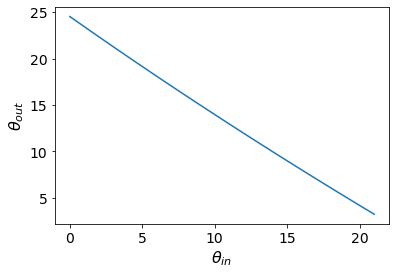

In [25]:
theta_in = np.linspace(0,angle)*u.deg
wavelength = 500*u.nm
theta_out = np.arcsin((wavelength/(1/grooves_per_mm)-np.sin(theta_in)))
pl.plot(theta_in, theta_out.to(u.deg))
pl.xlabel(r"$\theta_{in}$", fontsize=16)
pl.ylabel(r"$\theta_{out}$", fontsize=16);

Say we want to position 500 nm at the center of our detector, and the angle of the system is still the same we assumed above.

### Can we rotate the grating such that 500nm will be centered on the detector?  If so, at what angle?

(exercise)


In [26]:
angle = 21*u.deg
theta_out = np.arcsin((500*u.nm/(1/grooves_per_mm))-np.sin(angle.to(u.rad)))
theta_out.to(u.deg)

<Quantity 3.24651442 deg>

### Can we rotate the grating such that 400nm will be centered on the detector?  If so, at what angle?

In [27]:
theta_out = np.arcsin((400*u.nm/(1/grooves_per_mm))-np.sin(angle.to(u.rad)))
theta_out.to(u.deg)

<Quantity -1.51094734 deg>

### Can we rotate the grating such that 656.3nm will be centered on the detector?  If so, at what angle?  Why is this a significant wavelength?

In [28]:
theta_out = np.arcsin((656.3*u.nm/(1/grooves_per_mm))-np.sin(angle.to(u.rad)))
theta_out.to(u.deg)

<Quantity 10.74049495 deg>

This wavelength is the H-alpha wavelength. The H-alpha light is the brightest hydrogen line wavelength in the visible spectra.

### What is the actual angle of the grating?  And what central wavelength does it imply?

In [29]:
actual_angle = 20*u.deg
radians = actual_angle.to(u.rad)
wavelength = (1/grooves_per_mm)*np.sin(radians)
wavelength.to(u.AA)

<Quantity 4120.72461838 Angstrom>

# Lab Measurements Part II

Each group will need to take turns performing these measurements, since we have only 1 Pepito.

Set up Pepito to take in-lab spectra.  Obtain spectra of:

* The overhead fluorescent bulbs
* Helium
* Hydrogen
* Neon

Ensure that the spectra are obtained in-focus and properly aligned on the detector.

Be careful that the fiber does not rotate between observations!

Examine the spectra. Start with hydrogen.

Recall from your quantum class that the wavelength of hydrogen lines is given by:

$$ \lambda = Ry \left(\frac{1}{n_l}^2 - \frac{1}{n_u}^2\right)$$

### What lines are in the spectrum? *What lines COULD be in our spectrum*

The CCD is sensitive to 400 to 1000 nm

In [30]:
alpha = 6562.8
beta = 4861
gamma = 4339.4
delta = 4100

### Given your measurement of the central wavelength on the detector, what is the angle of the grating?

In [31]:
angle = 21*u.deg
theta_out = np.arcsin((636.3*u.nm/(1/grooves_per_mm))-np.sin(angle.to(u.rad)))
theta_out.to(u.deg)

<Quantity 9.77392632 deg>

## Wavelength Calibration

In [32]:
from astropy.io import fits
from PIL import Image as PILImage
import pylab as pl
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter
from IPython.display import Image
from astroquery.nist import Nist
pl.rcParams['image.origin'] = 'lower'
pl.matplotlib.style.use('dark_background')

Let's do neon because we know it will be the most relatively well behaved to start out.

In [33]:
hg_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\lights_straight_up.FIT"
hy_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\hydrogen.FIT"
he_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\helium.FIT"
ne_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\neon.FIT"
sun_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\sun_10s.FIT"
hy1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\group1_hydrogen_10s.FIT"
hy2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\group2_hydrogen_10s.FIT"

In [34]:
ne_image = fits.getdata(ne_filename)
he_image = fits.getdata(he_filename)
h_image = fits.getdata(hy_filename)
lights_image = fits.getdata(hg_filename)

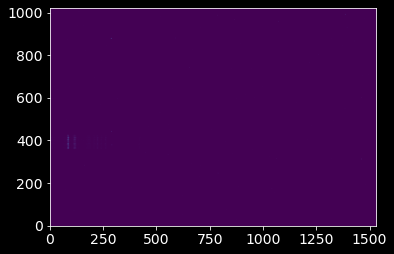

In [35]:
pl.imshow(ne_image);

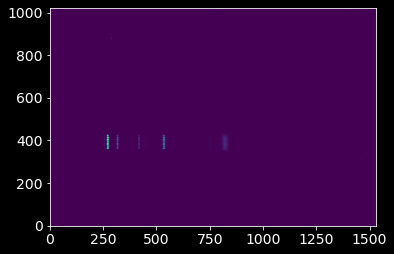

In [36]:
pl.imshow(he_image);

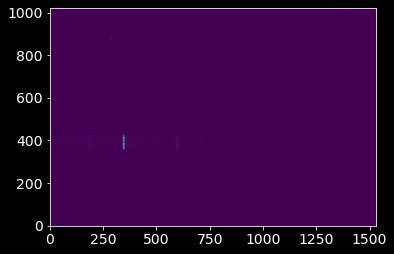

In [37]:
pl.imshow(h_image);

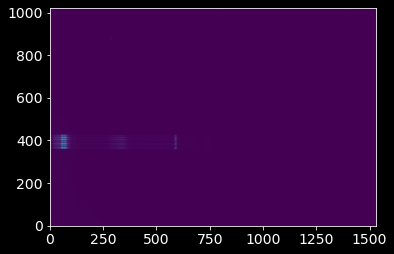

In [38]:
pl.imshow(lights_image);

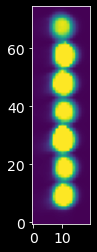

In [39]:
pl.imshow(he_image[355:430,260:280]);

In [40]:
ne_spectrum = ne_image[350:450,:].mean(axis=0)
he_spectrum = he_image[350:450,:].mean(axis=0)
h_spectrum = h_image[350:450,:].mean(axis=0)
lights_spectrum = lights_image[350:450,:].mean(axis=0)

In [41]:
xaxis = np.arange(he_image.shape[1])

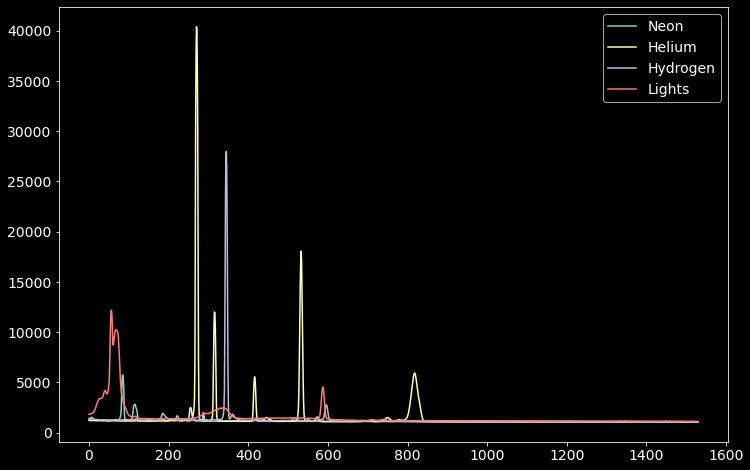

In [42]:
pl.figure(figsize = (12,8))
pl.plot(xaxis, ne_spectrum, label='Neon')
pl.plot(xaxis, he_spectrum, label='Helium')
pl.plot(xaxis, h_spectrum, label='Hydrogen')
pl.plot(xaxis, lights_spectrum, label='Lights')
pl.legend(loc='best');

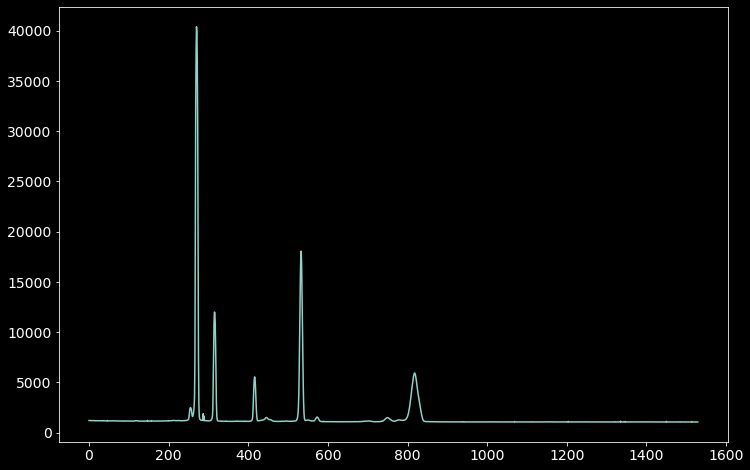

In [43]:
pl.figure(figsize = (12,8))
pl.plot(xaxis, he_spectrum);

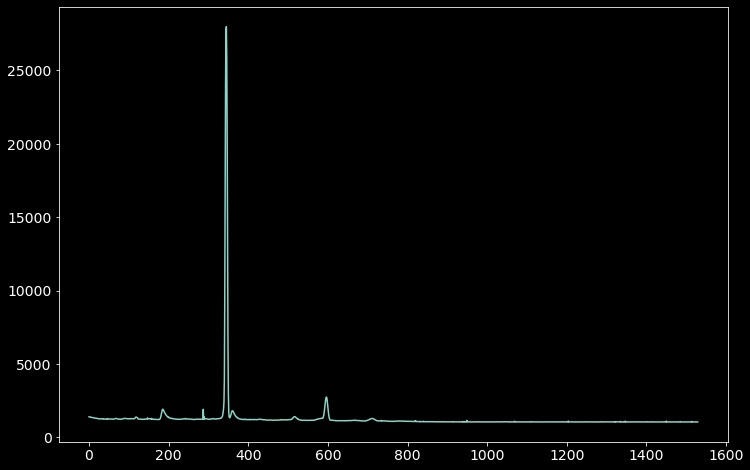

In [44]:
pl.figure(figsize = (12,8))
pl.plot(xaxis, h_spectrum);

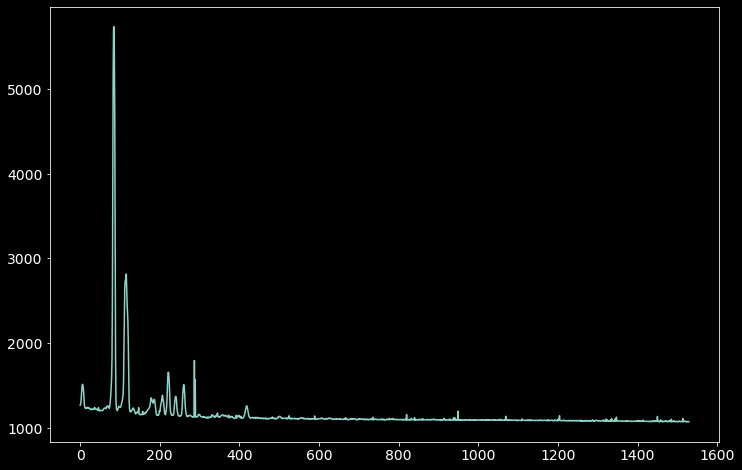

In [45]:
pl.figure(figsize = (12,8))
pl.plot(xaxis, ne_spectrum);

### We have a labeled spectrum for Neon already so I'm going to try to work with that one first because I think it would be easiest.

In [46]:
from IPython.display import Image
Image(filename = "NeonLampOldPepitoLabeled.png")

FileNotFoundError: [Errno 2] No such file or directory: 'NeonLampOldPepitoLabeled.png'

As we can see we have clearly some of the same wavelengths as the already labeled image. Our spectrum is flipped horizontally in reference to the already labeled one but this happens sometimes and doesn't mean anything is wrong with our data.

In [ ]:
guessed_wavelengths = [540, 534, 520, 515, 511, 508, 504]
guessed_xvals = [80, 115, 185, 207, 220, 240, 260]

In [ ]:
npixels = 10
improved_xval_guesses = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=ne_spectrum[g-npixels:g+npixels] - np.median(ne_spectrum))
                         for g in guessed_xvals]
improved_xval_guesses

In [ ]:
pl.figure(figsize = (14,10))
pl.plot(xaxis[0:400], ne_spectrum[0:400])
pl.plot(guessed_xvals[0:400], [2000]*7, 'x')
pl.plot(improved_xval_guesses[0:400], [2000]*7, '+');

I really like this fit that we got with our improved guesses so we're gonna work with this. It took a while to tweak the guesses and the npixels values but I ended up getting something I liked.

In [ ]:
linfitter = LinearLSQFitter()

In [ ]:
wlmodel = Linear1D()
linfit_wlmodel = linfitter(model=wlmodel, x=improved_xval_guesses, y=guessed_wavelengths)
wavelengths = linfit_wlmodel(xaxis) * u.nm
linfit_wlmodel

In [ ]:
pl.figure(figsize = (14,10))
pl.plot(wavelengths, ne_spectrum)
pl.plot(guessed_wavelengths, [2000]*7, 'x');

In [ ]:
pl.plot(improved_xval_guesses, guessed_wavelengths, 'o')
pl.plot(xaxis, wavelengths, '-')
pl.ylabel("$\lambda(x)$")
pl.xlabel("x (pixels)")

This fit looks pretty good but we have a lot of data to fit past ~250 pixels to accurately assess if it really is a good fit or not.

In [ ]:
minwave = wavelengths.min()
maxwave = wavelengths.max()

hydrogen_lines = Nist.query(minwav=minwave,
                           maxwav=maxwave,
                           linename='H I')
helium_lines = Nist.query(minwav=minwave,
                           maxwav=maxwave,
                           linename='He I')
neon_lines = Nist.query(minwav=minwave,
                        maxwav=maxwave,
                        linename='Ne I')

In [ ]:
pl.figure(figsize = (14,10))
pl.plot(wavelengths, ne_spectrum)
pl.vlines(neon_lines['Observed'], 6000, 250, 'w', alpha=0.20);
pl.axis([450, 550, 1000, 6000])

In [ ]:
ne_keep = np.array([('*' not in x) and ('f' not in x) for x in neon_lines['Rel.']])
ne_wl_tbl = neon_lines['Observed'][ne_keep]
ne_rel_tbl = np.array([float(x) for x in neon_lines['Rel.'][ne_keep]])

In [ ]:
ne_rel_intens = ne_rel_tbl / ne_rel_tbl.max() * ne_spectrum.max()
pl.plot(wavelengths, ne_spectrum)
pl.plot(ne_wl_tbl, ne_rel_intens, 'x')
pl.xlabel('Wavelength (nm)');

In [ ]:
ne_keep_final = ne_rel_intens > 1500
pl.plot(wavelengths, ne_spectrum)
pl.plot(ne_wl_tbl[ne_keep_final], ne_rel_intens[ne_keep_final], 'x')
pl.xlabel('Wavelength (nm)');

In [ ]:
ne_wl_final = ne_wl_tbl[ne_keep_final]
ne_pixel_vals = linfit_wlmodel.inverse(ne_wl_final)

In [ ]:
npixels = 10
improved_xval_guesses_ne = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=ne_spectrum[g-npixels:g+npixels] - np.median(ne_spectrum))
                         for g in map(int, ne_pixel_vals)]
improved_xval_guesses_ne

In [ ]:
pl.plot(improved_xval_guesses_ne, ne_wl_final, '^', label='Neon')
#pl.plot(improved_xval_guesses, guessed_wavelengths, '+', label='Hydrogen')
pl.plot(xaxis, wavelengths, zorder=-5)
pl.plot(xaxis, linfit_wlmodel(xaxis), zorder=-5)
pl.legend(loc='best')
pl.xlabel("Pixel Coordinate")
pl.ylabel("Wavelength (nm)");

### Helium wavelength assessment

In [47]:
he_keep1 = np.array(['*' not in x for x in helium_lines['Rel.']])
he_keep2 = (~helium_lines['Rel.'].mask)

NameError: name 'helium_lines' is not defined

In [ ]:
he_keep = []
for i in range(len(he_keep1)):
    if he_keep2[i] == 1 & he_keep1[i] == 1:
        he_keep.append(1)
    else:
        he_keep.append(0)
he_keep = np.array(he_keep)
he_keep

I have to make this for loop because I want the true values that are shared among both arrays. For some reason when I tried to remove the masked values and the * values at once I would get a lot of weird errors so this is my work around. Even with this I still have to remove more * which is weird but I eventually get it to kind of work.

In [ ]:
helium_lines['Rel.'] = helium_lines['Rel.'][he_keep]
he_keep_true = np.array(['*' not in x for x in helium_lines['Rel.']])

In [ ]:
he_wl_tbl = helium_lines['Observed'][he_keep_true]
he_rel_tbl = np.array([float(x) for x in helium_lines['Rel.'][he_keep_true]])

In [ ]:
he_rel_intens = he_rel_tbl / he_rel_tbl.max() * 10000

In [ ]:
he_keep_final = he_rel_intens > 9999
pl.plot(wavelengths, he_spectrum)
pl.plot(he_wl_tbl[he_keep_final], he_rel_intens[he_keep_final], 'x')
pl.xlabel('Wavelength (nm)');

A few of the values along our spectrum are represented but not the largest spike at 500 nm which is unfortunate. But, this spike in our data could be due to a physical error in the collection of the data during the lab so I'm not going to think too much about it.

In [ ]:
he_wl_final = he_wl_tbl[he_keep_final]
he_pixel_vals = linfit_wlmodel.inverse(he_wl_final)

In [ ]:
he_pixel_remove = (~he_pixel_vals.mask)
he_pixel_vals = he_pixel_vals[he_pixel_remove]
he_wl_remove = (~he_wl_final.mask)
he_wl_final = he_wl_final[he_wl_remove]

Somehow I still had masked values in my array so I hade to remove those values AGAIN. Our data is very janky compared to what I expected from this lab so it's taking a lot more work than I thought to get somewhat accurate wavelength guesses.

In [ ]:
npixels = 5
improved_xval_guesses_he = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=he_spectrum[g-npixels:g+npixels] - np.median(he_spectrum))
                         for g in map(int, he_pixel_vals)]
improved_xval_guesses_he

In [ ]:
pl.plot(improved_xval_guesses_he, he_wl_final, '^', label='Helium')
pl.plot(improved_xval_guesses_ne, ne_wl_final, '+', label='Neon')
pl.plot(xaxis, wavelengths, zorder=-5)
pl.plot(xaxis, linfit_wlmodel(xaxis), zorder=-5)
pl.legend(loc='best')
pl.xlabel("Pixel Coordinate")
pl.ylabel("Wavelength (nm)");

### Now onto Hydrogen

In [48]:
pl.figure(figsize = (14,10))
pl.plot(wavelengths, h_spectrum)
pl.vlines(hydrogen_lines['Observed'], 30000, 250, 'w', alpha=0.20);

NameError: name 'wavelengths' is not defined

<Figure size 1008x720 with 0 Axes>

In [ ]:
h_keep = (~hydrogen_lines['Rel.'].mask) & (hydrogen_lines['Rel.'] != "700bl") & (hydrogen_lines['Rel.'] != "1100bl") & (hydrogen_lines['Rel.'] != "900bl") & (hydrogen_lines['Rel.'] != "1000bl") & (hydrogen_lines['Rel.'] != "1200bl")
h_wl_tbl = hydrogen_lines['Observed'][h_keep]
h_rel_tbl = np.array([float(x) for x in hydrogen_lines['Rel.'][h_keep]])

In [ ]:
pl.plot(wavelengths, h_spectrum)
pl.plot(h_wl_tbl, h_rel_tbl / h_rel_tbl.max() * h_spectrum.max(), 'x')
pl.xlabel("$\lambda$ [nm]")
pl.title("Hydrogen");

In [ ]:
h_rel_intens =  h_rel_tbl / h_rel_tbl.max() * h_spectrum.max()
h_keep_final = h_rel_intens > 12500
h_wl_final = h_wl_tbl[h_keep_final]

In [ ]:
h_pixel_vals = linfit_wlmodel.inverse(h_wl_final)

In [ ]:
pl.plot(xaxis, h_spectrum)
pl.plot(h_pixel_vals, h_rel_intens[h_keep_final], 'x');

In [ ]:
npixels = 15
improved_xval_guesses_h = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=h_spectrum[g-npixels:g+npixels] - np.median(h_spectrum))
                         for g in map(int, h_pixel_vals)]
improved_xval_guesses_h

In [ ]:
pl.plot(improved_xval_guesses_h, h_wl_final, 'x', label='Hydrogen')
pl.plot(improved_xval_guesses_he, he_wl_final, '^', label='Helium')
pl.plot(improved_xval_guesses_ne, ne_wl_final, '+', label='Neon')
pl.plot(xaxis, wavelengths, zorder=-5)
pl.plot(xaxis, linfit_wlmodel(xaxis), zorder=-5)
pl.legend(loc='best')
pl.xlabel("Pixel Coordinate")
pl.ylabel("Wavelength (nm)");

This looks surprisingly good for the quality of data that I was processing. All of the datapoints seems like lie pretty well along the line that we fitted earler.

Now we will concatenate all of the data into one fit.

In [ ]:
xvals_ne_plus_he_plus_h = list(improved_xval_guesses_ne) + list(improved_xval_guesses_he) + list(improved_xval_guesses_h)
waves_ne_plus_he_plus_h = list(ne_wl_final) + list(he_wl_final) + list(h_wl_final)
linfit_wlmodel_neheh = linfitter(model=wlmodel, x=xvals_ne_plus_he_plus_h, y=waves_ne_plus_he_plus_h)
linfit_wlmodel_neheh

In [ ]:
pl.plot(improved_xval_guesses_h, h_wl_final, 'x', label='Hydrogen')
pl.plot(improved_xval_guesses_he, he_wl_final, '^', label='Helium')
pl.plot(improved_xval_guesses_ne, ne_wl_final, '+', label='Neon')
pl.plot(xaxis, wavelengths, zorder=-5)
# Plotting the same thing but with the final wavelength solution!
pl.plot(xaxis, linfit_wlmodel_neheh(xaxis), zorder=-5, color='r')
pl.legend(loc='best')
pl.xlabel("Pixel Coordinate")
pl.ylabel("Wavelength (nm)");

This is our final wavelength solution, now all we need to solve for is the angle that Pepito is at. We can do this by taking the median of all of the wavelengths we identified (h_wl_final, he_wl_final, ne_wl_final) and plugging them into the grating equation.

In [ ]:
np.median(h_wl_final)

In [ ]:
np.median(he_wl_final)